# Projet 2

## We gonna search for some insight about a student performance Data Set

The data comes from a portuguese thesis made by P. Cortez and A. Silva. Every raw represent a portuguese students with information such as sociological background, health, like to go out, grades in portuguese class....
data comes from https://archive.ics.uci.edu/ml/datasets/student%2Bperformance
thesis: http://www3.dsi.uminho.pt/pcortez/student.pdf

In [1]:
#import libraries
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Load and inspect the datas

In [2]:
students = pd.read_csv('./student-por.csv', sep=';')

In [3]:
students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [4]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [5]:
'''
We have 33 columns and 649 entries. 
Every entry design a secondary education student in portuguese language for year 2008 with: 
their school (2 choices), basic informations (sex, age, adress), social background (family size, parents 
living together or not, parents' education, parents' job), guardian, traveltime to get to school, studytime, 
number of failure at past class, extra educational support, family educational support, extra paid classes 
within the course subject, extra curriculum activities, if the student attended nursery, if he is willing to take 
higher education, internet access at home, if he is engaged in a romantic relationship, the quality of his/her family
relationship, if he has a lot of freetime after school, if he/her goes out a lot with friends, 
workday consumption of alcohol, weekend alcohol consumption, health status, number of school absence,
and finally the grades for first, second and third period

There seems to be no missing entries

data-type match with the expected type
'''

"\nWe have 33 columns and 649 entries. \nEvery entry design a secondary education student in portuguese language for year 2008 with: \ntheir school (2 choices), basic informations (sex, age, adress), social background (family size, parents \nliving together or not, parents' education, parents' job), guardian, traveltime to get to school, studytime, \nnumber of failure at past class, extra educational support, family educational support, extra paid classes \nwithin the course subject, extra curriculum activities, if the student attended nursery, if he is willing to take \nhigher education, internet access at home, if he is engaged in a romantic relationship, the quality of his/her family\nrelationship, if he has a lot of freetime after school, if he/her goes out a lot with friends, \nworkday consumption of alcohol, weekend alcohol consumption, health status, number of school absence,\nand finally the grades for first, second and third period\n\nThere seems to be no missing entries\n\nda

## Let's check if we can find some outliers, check if the mean, standard deviation, quartile, min-max seems coherent

In [6]:
students.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [7]:
'''
The data seem coherent and the standard deviation seems normal
'''

'\nThe data seem coherent and the standard deviation seems normal\n'

In [8]:
#usually 0 marks are put for absent students. we are gonna search for those who got zero and eventually dispose of them
print(students['G1'][students['G1'] == 0])
print(students['G2'][students['G2'] == 0])
print(students['G3'][students['G3'] == 0])
students.drop(students.loc[(students['G1'] == 0)| (students['G2'] == 0) | (students['G3'] == 0)].index, inplace=True)

0    0
Name: G1, dtype: int64
440    0
563    0
567    0
597    0
603    0
605    0
610    0
Name: G2, dtype: int64
163    0
440    0
519    0
563    0
567    0
583    0
586    0
597    0
603    0
605    0
610    0
626    0
637    0
639    0
640    0
Name: G3, dtype: int64


In [9]:
#regroup the 3 grades into a single one and dispose of grades from 1st, 2nd and 3rd grade
students['avg_grade'] = (students['G1'] + students['G2'] + students['G3'])/3
students['avg_grade'] = students['avg_grade'].round(0)
students.drop(['G1','G2','G3'], axis=1, inplace=True)

In [10]:
students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,avg_grade
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,10.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,12.0
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,14.0
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,12.0
5,GP,M,16,U,LE3,T,4,3,services,other,...,yes,no,5,4,2,1,2,5,6,12.0


In [11]:
students.shape

(633, 31)

## From here, we can separate our database in 2
### 80% for exploratory analysis, 20% for statistic test

In [12]:
# we search at which index, we're going to split the data
i_analysis = int(len(students)*.8)
print(i_analysis)

506


In [13]:
# we will do the exploratory analysis with student1 while we'll keep student2 for statistic test
students1 = students[:i_analysis]
students2 = students[i_analysis:]

### let's do the same check as the beggining

In [14]:
students1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,avg_grade
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,10.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,12.0
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,14.0
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,12.0
5,GP,M,16,U,LE3,T,4,3,services,other,...,yes,no,5,4,2,1,2,5,6,12.0


In [15]:
students1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 1 to 508
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      506 non-null    object 
 1   sex         506 non-null    object 
 2   age         506 non-null    int64  
 3   address     506 non-null    object 
 4   famsize     506 non-null    object 
 5   Pstatus     506 non-null    object 
 6   Medu        506 non-null    int64  
 7   Fedu        506 non-null    int64  
 8   Mjob        506 non-null    object 
 9   Fjob        506 non-null    object 
 10  reason      506 non-null    object 
 11  guardian    506 non-null    object 
 12  traveltime  506 non-null    int64  
 13  studytime   506 non-null    int64  
 14  failures    506 non-null    int64  
 15  schoolsup   506 non-null    object 
 16  famsup      506 non-null    object 
 17  paid        506 non-null    object 
 18  activities  506 non-null    object 
 19  nursery     506 non-null    o

In [16]:
students1.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,avg_grade
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.00000,506.000000,506.000000
mean,16.583004,2.581028,2.377470,1.494071,1.980237,0.187747,3.934783,3.193676,3.171937,1.482213,2.252964,3.55336,3.944664,12.007905
std,1.234018,1.107292,1.085369,0.739925,0.851094,0.547115,0.932205,1.000020,1.160438,0.918824,1.298606,1.43165,4.960527,2.429998
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000,6.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.00000,0.000000,10.000000
50%,16.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.00000,2.000000,12.000000
75%,17.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.00000,6.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,32.000000,19.000000


In [17]:
'''
we reach the same conclusion as before, the data seems normal.
there are some outlier with the column age but they are not so fare from the 3th quartile
'''

'\nwe reach the same conclusion as before, the data seems normal.\nthere are some outlier with the column age but they are not so fare from the 3th quartile\n'

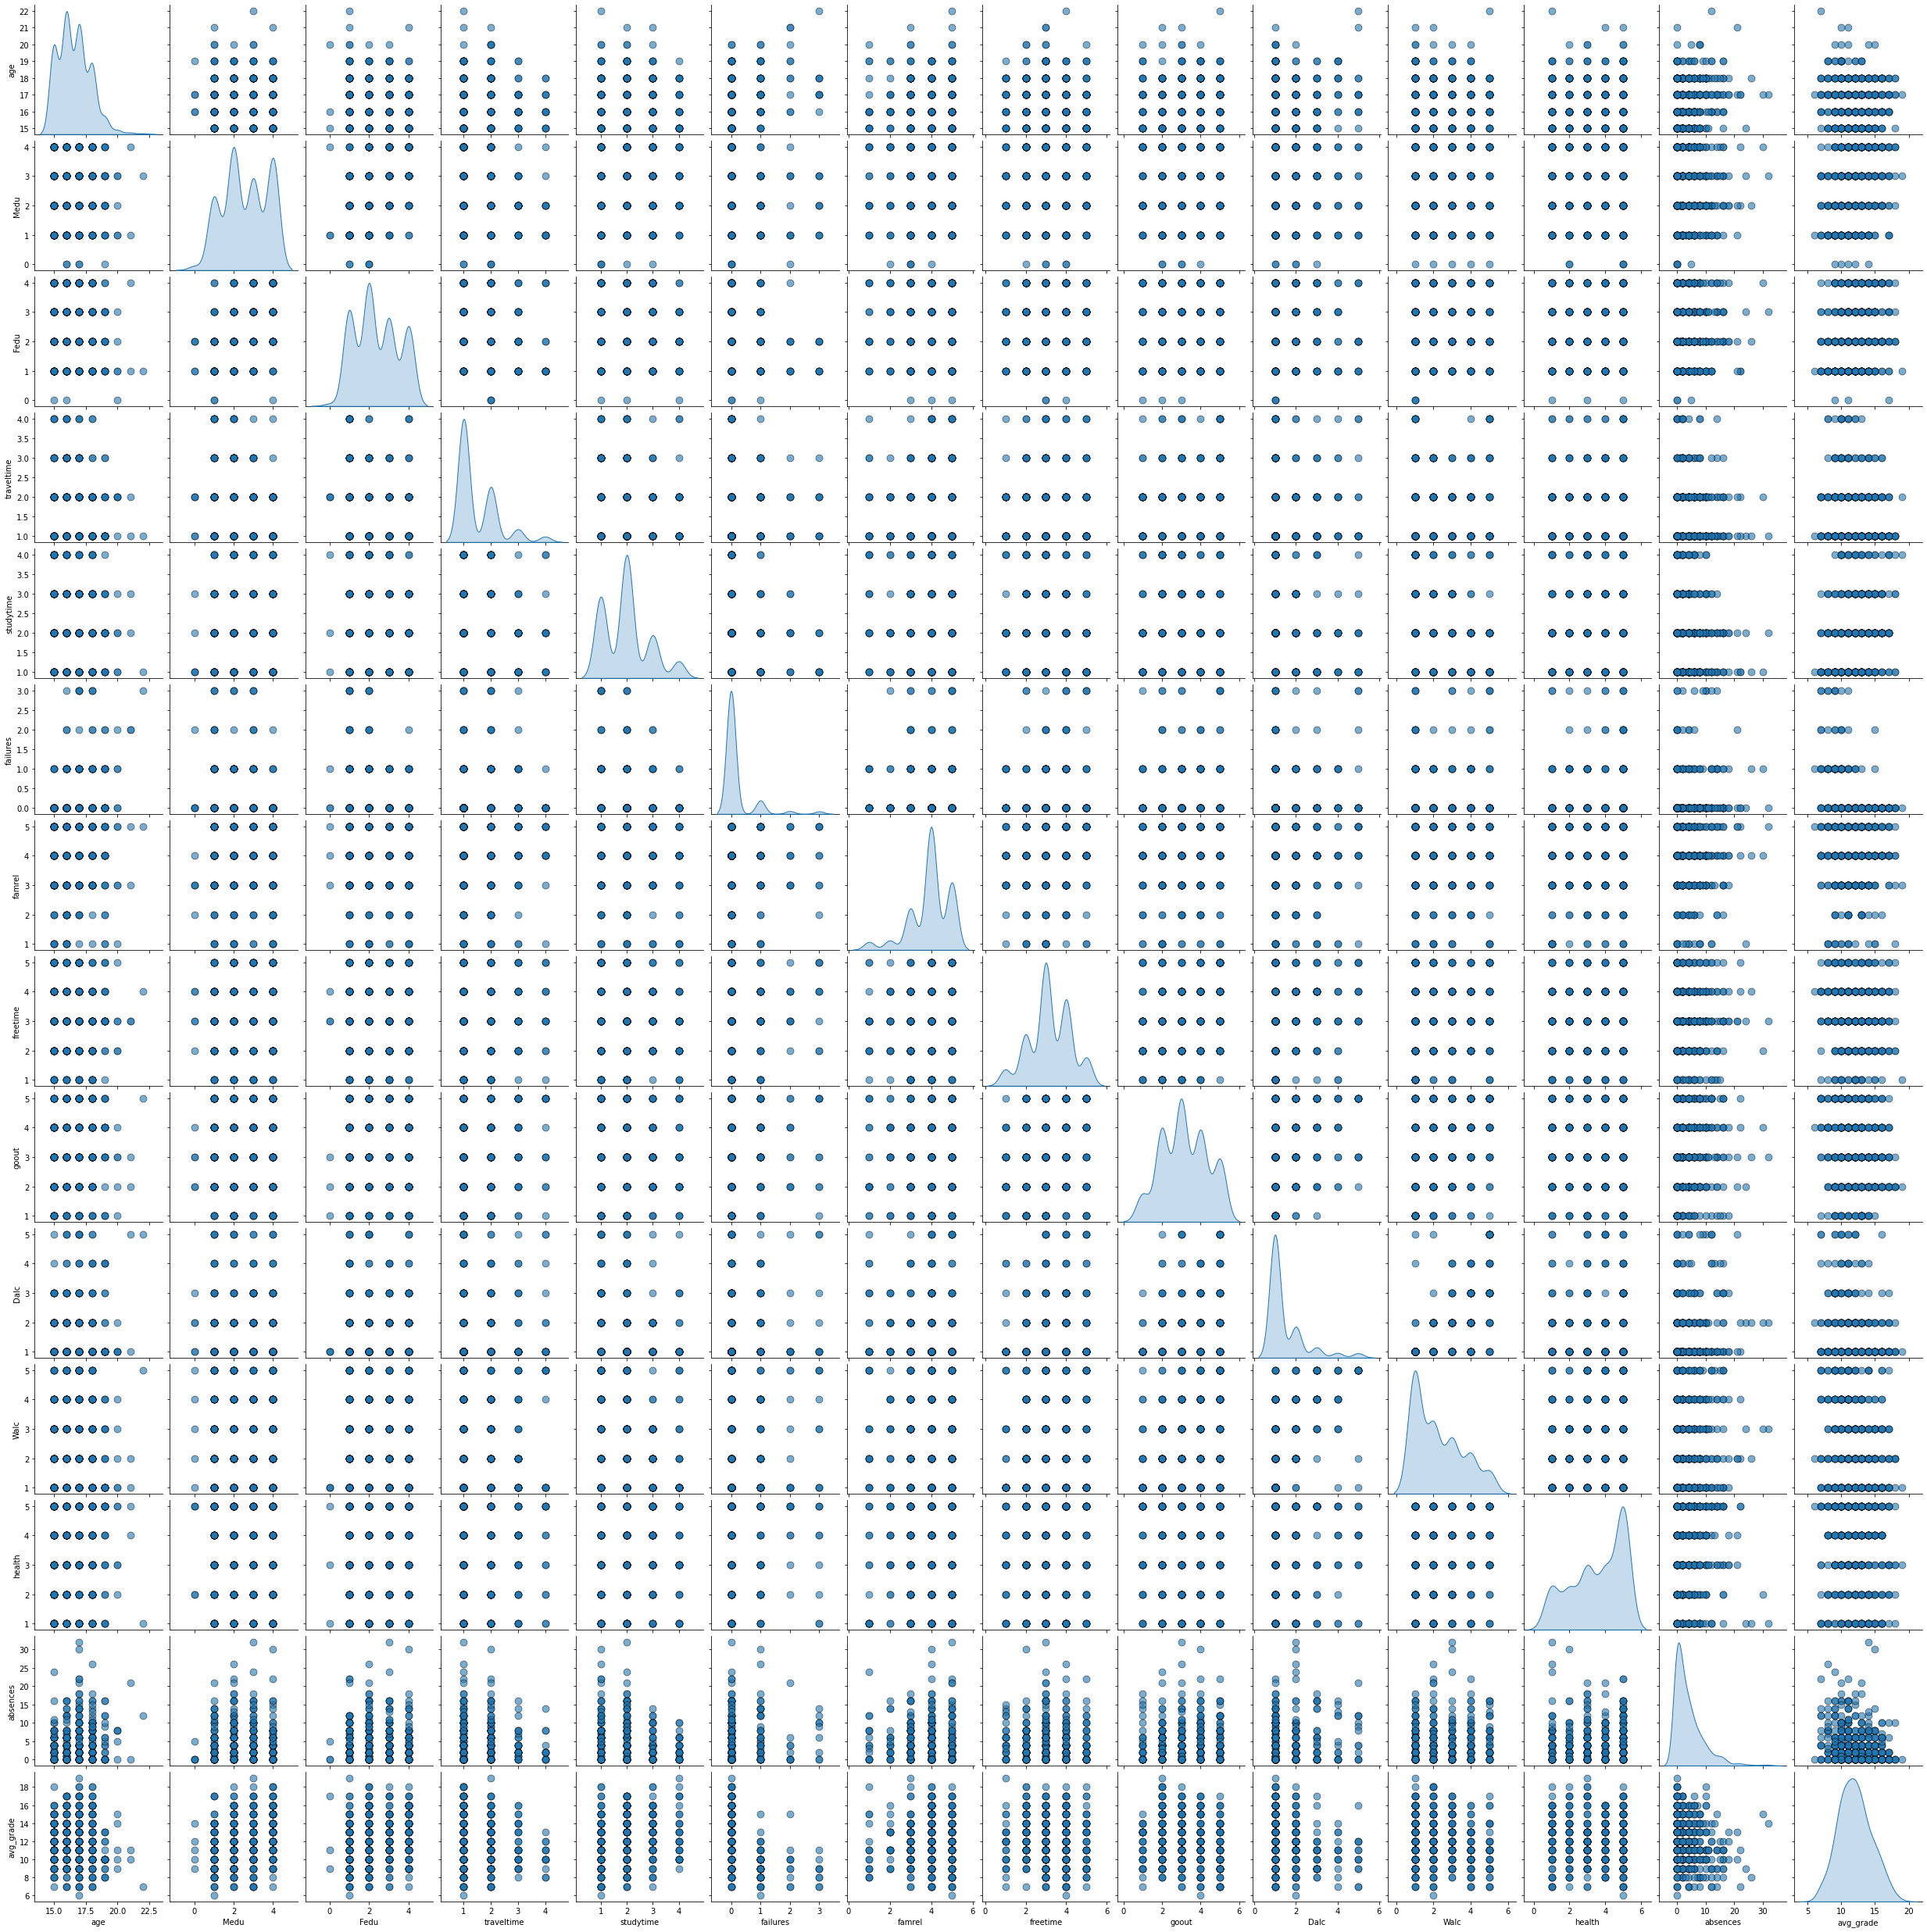

In [18]:
sns.pairplot(students1, diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

In [19]:
'''
there don't seem to be any clear correlation
'''

"\nthere don't seem to be any clear correlation\n"

<AxesSubplot:>

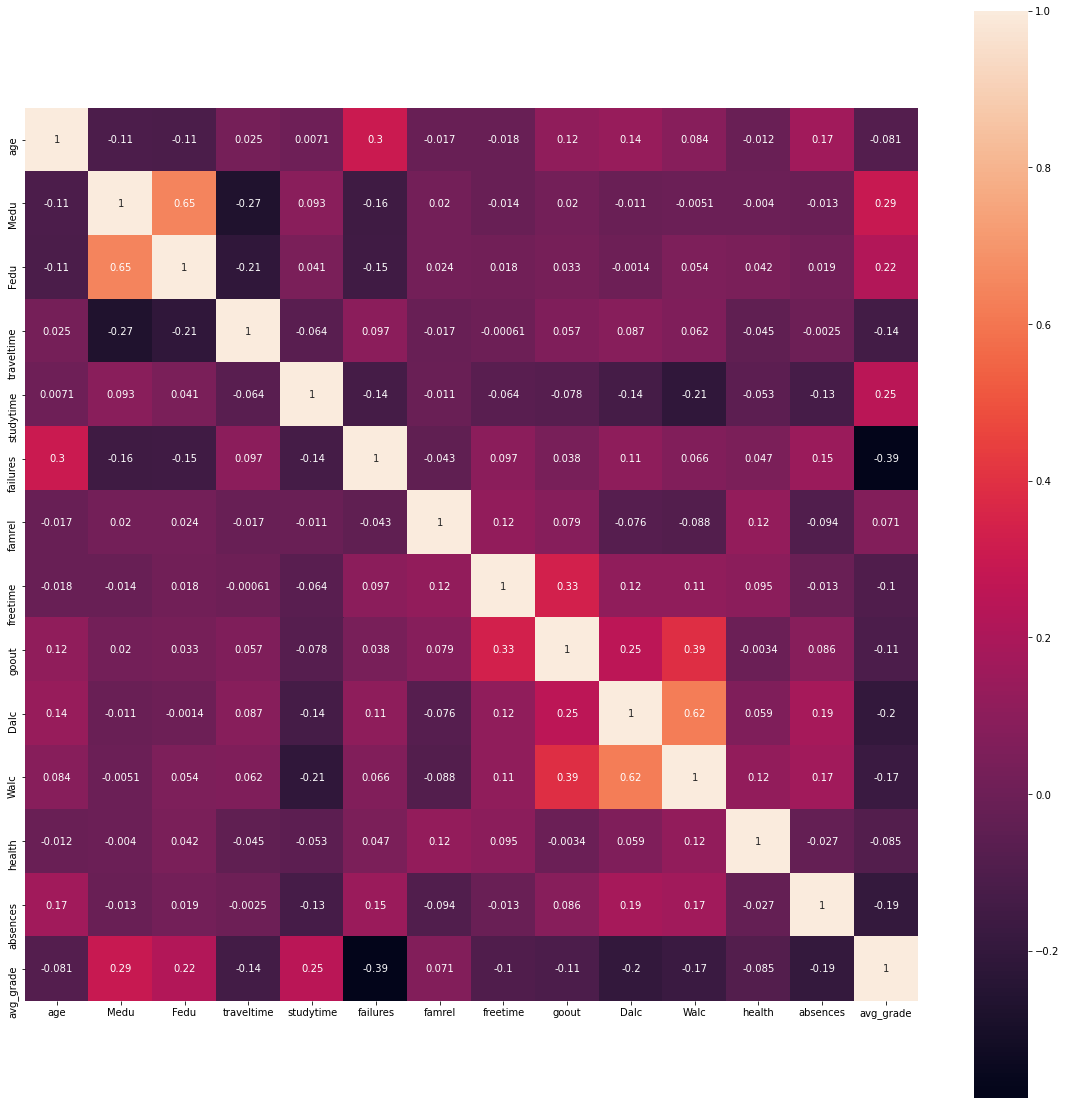

In [29]:
plt.figure(figsize=(20,20))
sns.heatmap(data=students.corr(),annot=True,square=True)

In [21]:
'''
we can observe that the student's mother education is pretty well correlated with the father's education
that failures is negatively correlated with good result, and a bit correlated to age (failer's are more often older)
student with more freetime, go outside more
alcohol consumption during week days is correlated witch alcohol consumption during weekend and with goint out
result to the 3 period are highly correlated with each other, correlated with father's education and negatively correlated with failures
'''

"\nwe can observe that the student's mother education is pretty well correlated with the father's education\nthat failures is negatively correlated with good result, and a bit correlated to age (failer's are more often older)\nstudent with more freetime, go outside more\nalcohol consumption during week days is correlated witch alcohol consumption during weekend and with goint out\nresult to the 3 period are highly correlated with each other, correlated with father's education and negatively correlated with failures\n"

In [22]:
'''
we are gonna focus this study on sex, Fedu and Medu, failures, absence, studytime, schoolsup and famsup, 
higher, internet with avg_grade. Altough it's very interesting, we will not keep the rest of the data
'''

"\nwe are gonna focus this study on sex, Fedu and Medu, failures, absence, studytime, schoolsup and famsup, \nhigher, internet with avg_grade. Altough it's very interesting, we will not keep the rest of the data\n"

In [23]:
students1_clean = students1[['age','sex','studytime','schoolsup','famsup', 'paid', 'Fedu', 'Medu', 'failures', 'absences', 'higher', 'internet', 'avg_grade']]

In [24]:
students1_clean.head()

,age,sex,studytime,schoolsup,famsup,paid,Fedu,Medu,failures,absences,higher,internet,avg_grade
1,17,F,2,no,yes,no,1,1,0,2,yes,yes,10.0
2,15,F,2,yes,no,no,1,1,0,6,yes,yes,12.0
3,15,F,3,no,yes,no,2,4,0,0,yes,yes,14.0
4,16,F,2,no,yes,no,3,3,0,0,yes,no,12.0
5,16,M,2,no,yes,no,3,4,0,6,yes,yes,12.0


In [25]:
students1_clean.to_csv('students_por_clean.csv', index=False)

In [27]:
students1.shape

(506, 31)